In [1]:
push!(LOAD_PATH,pwd())
using ProfileView
using constants
using types10
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Eoff=5.0
Ts=collect(300.0:10.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-1.8e20]#,-1.22e18,-1.02e18,-0.94e18]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e18]#,1e18,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.6]#,0.8,0.7,0.61]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=7.0#9.0-1.5*x*x
    Dv=1.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandX3,bandX3,bandX3],var0)#

#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauPOP3(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(epsilon0_x(var[4]),var[1],var[9])
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI,tauPOP3],vartau0)#,tauII2,tauPOP2,tauPOP3

xmax=3.0

3.0

In [3]:
Ec0(1.0)

-0.165

In [4]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 20.044148 seconds (117.56 M allocations: 17.502 GiB, 10.27% gc time)


3.0

In [5]:
foreach(x->println(x," ", kees[x,1,1]),1:length(sigmaes[:,:,1]))

1 1.315505462397962
2 1.32830528160931
3 1.3399956332230105
4 1.351121369737561
5 1.360372341948882
6 1.3687808926874672
7 1.3763042016294873
8 1.3829691011294512
9 1.3890365644730567
10 1.393884886182906
11 1.398057851634585
12 1.4015591848697728
13 1.4044142646973914
14 1.4069263571972705
15 1.4083367098746815
16 1.4093014068807934
17 1.4097818209512452
18 1.4097908967384212
19 1.409349963212195
20 1.4084828240876586
21 1.4073184337309421
22 1.4055193975127762
23 1.403427853257635
24 1.4010305530196119
25 1.3983379960489781
26 1.3953671326815886
27 1.3921365346976344
28 1.388668619826071
29 1.3849785686497764
30 1.3810732260218122
31 1.376925638731163
32 1.372645850504739
33 1.368234327543611
34 1.3637077535702975
35 1.3590926674407826
36 1.3544026270991867
37 1.3496546859099205
38 1.3448722032354845
39 1.3400986751810597
40 1.3353344835845253
41 1.330575338042923
42 1.3258459738850896
43 1.321268353860133
44 1.3168013944246915
45 1.3124833049757365
46 1.3083455898595093
47 1.3044985

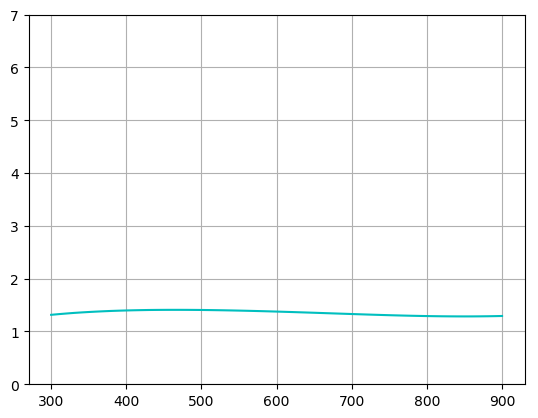

In [6]:
plot(Ts,kees[:,1,1],linestyle="-",color="c")
ylim(0,7)
grid()

In [7]:
foreach(x->println(x," ", kbis[x,1,1]),1:length(sigmaes[:,:,1]))

1 2.9491091760524114e-8
2 6.791330443388336e-8
3 1.501425423455886e-7
4 3.1742243173469777e-7
5 6.434305958150194e-7
6 1.2619075922047977e-6
7 2.355406962851489e-6
8 4.278690021591291e-6
9 7.550329541746056e-6
10 1.2970215982445658e-5
11 2.165740258274566e-5
12 3.520153979059003e-5
13 5.613793301666056e-5
14 8.776142558619514e-5
15 0.00013593283653349296
16 0.00020179653570022557
17 0.00029796024452638807
18 0.00043389615644564373
19 0.000622883645944437
20 0.0008824718521244211
21 0.0012245211412993608
22 0.0016867107412539366
23 0.0022992905630934177
24 0.0031014139291431265
25 0.0041276315300263515
26 0.0054337068954023226
27 0.007105777746671052
28 0.009218102311196786
29 0.011863988626710988
30 0.015073529096103289
31 0.01904708272650465
32 0.023932679798966877
33 0.02988119864325218
34 0.037083302233216264
35 0.04546674391444094
36 0.05561778418516262
37 0.06771091868498318
38 0.08201020426278902
39 0.09867918934085662
40 0.11783962283911308
41 0.14039361093810215
42 0.1665795817

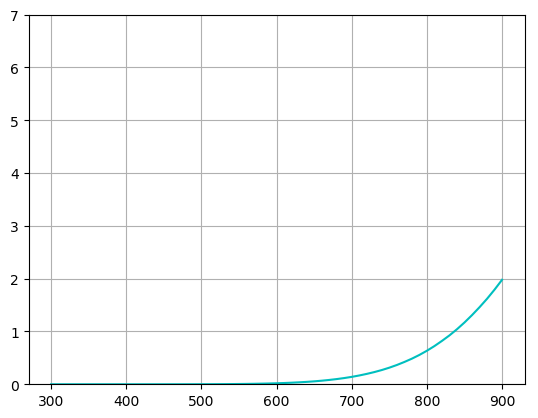

In [8]:
plot(Ts,kbis[:,1,1],linestyle="-",color="c")
ylim(0,7)
grid()

In [9]:
foreach(x->println(x," ", seebecks[x,1,1], "   es ",seebeckes[x,1,1],"   hs ",seebeckhs[x,1,1]),1:length(sigmaes[:,:,1]))

1 -0.00011538644255041829   es -0.0001153864427799666   hs 0.002054591429941009
2 -0.0001183482900515685   es -0.0001183482905892079   hs 0.0019850005257203603
3 -0.00012126384127267458   es -0.00012126384248224272   hs 0.0019184071230918195
4 -0.00012413424317659033   es -0.00012413424577863432   hs 0.0018557900295011203
5 -0.0001269606363795946   es -0.0001269606417458236   hs 0.0017968813455387148
6 -0.00012974415994144038   es -0.0001297441706572547   hs 0.001739638940611826
7 -0.00013248594489371926   es -0.0001324859652324312   hs 0.0016877303143423845
8 -0.00013518710284537048   es -0.00013518714042839216   hs 0.0016377340162221047
9 -0.0001378487165817541   es -0.0001378487840407614   hs 0.0015902669168837375
10 -0.00014047183291730596   es -0.00014047195079323782   hs 0.0015449755479323046
11 -0.00014305745839440583   es -0.0001430576585728109   hs 0.001502005773707465
12 -0.00014560655687348556   es -0.00014560688764163882   hs 0.0014615982676461493
13 -0.0001481200434659956 

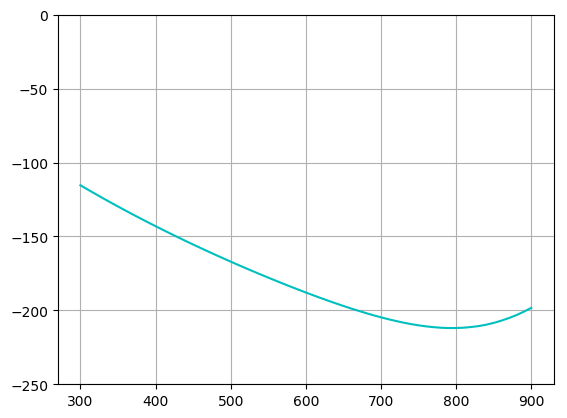

In [10]:
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="c")
ylim(-250,-0)
grid()

In [11]:
foreach(x->println(x," ", sigmas[x,1,1], "   es ",sigmaes[x,1,1],"   hs ",sigmahs[x,1,1]),1:length(sigmaes[:,:,1]))

1 197351.3931589832   es 197351.39313810665   hs 2.0876562260424615e-5
2 193727.2793381193   es 193727.27928860043   hs 4.951885175855484e-5
3 190179.3382471589   es 190179.33813437854   hs 0.00011278038160825616
4 186706.93961860615   es 186706.9393732333   hs 0.00024537285393331327
5 183309.1702240028   es 183309.16971269314   hs 0.0005113096563617017
6 179984.87788665196   es 179984.8768549295   hs 0.0010317224525252132
7 176732.74319067367   es 176732.74121589935   hs 0.0019747743157753593
8 173551.34840419597   es 173551.34472519194   hs 0.0036790040359558455
9 170439.23083974727   es 170439.22418645356   hs 0.0066532937056433305
10 167394.91592026417   es 167394.90421308746   hs 0.011707176708012412
11 164416.938706958   es 164416.9186999966   hs 0.020006961379865715
12 161503.85316695442   es 161503.8199289256   hs 0.033238028811106955
13 158654.24083964954   es 158654.18665723197   hs 0.05418241756349759
14 155866.69841501015   es 155866.61187836085   hs 0.08653664930153711
15 

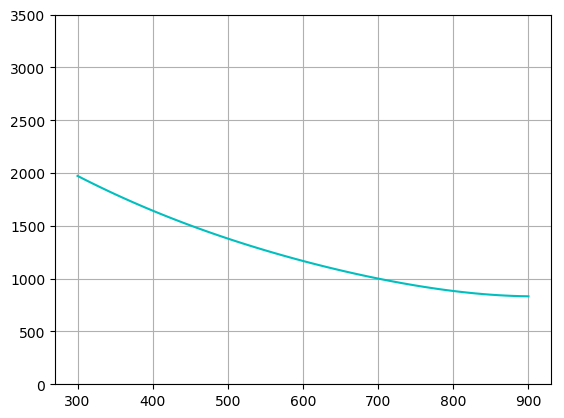

In [12]:
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="c")
ylim(0,3500)
grid()

In [13]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(undef,length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(undef,length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-EX3(0.0)
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))
#Efsr

In [14]:
foreach(x->println(x," EX3 ", Efsr[x,1,1]," EX1 ", Efsr[x,1,1]-Ec0(0.6)),1:length(Efsr[:,:,1]))

1 EX3 0.10132632198393487 EX1 0.04032632198393485
2 EX3 0.1005255976160555 EX1 0.03952559761605548
3 EX3 0.09970004193718385 EX1 0.03870004193718382
4 EX3 0.09884987345101326 EX1 0.03784987345101323
5 EX3 0.097975273345706 EX1 0.03697527334570597
6 EX3 0.09707638455133427 EX1 0.036076384551334245
7 EX3 0.09615332192249504 EX1 0.03515332192249501
8 EX3 0.09520618499258404 EX1 0.034206184992584016
9 EX3 0.09423506876004684 EX1 0.03323506876004681
10 EX3 0.09324007095153952 EX1 0.032240070951539496
11 EX3 0.09222129590980366 EX1 0.03122129590980363
12 EX3 0.09117885596788611 EX1 0.03017885596788608
13 EX3 0.09011287129009382 EX1 0.029112871290093795
14 EX3 0.08902346899839841 EX1 0.028023468998398388
15 EX3 0.08791078215833625 EX1 0.026910782158336227
16 EX3 0.08677494897186211 EX1 0.025774948971862083
17 EX3 0.08561611235410282 EX1 0.024616112354102798
18 EX3 0.08443441996049827 EX1 0.02343441996049825
19 EX3 0.0832300246696791 EX1 0.022230024669679077
20 EX3 0.08200308550090973 EX1 0.02

In [15]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############
con=1.0
thetaL=52.3e12*hbar/kB # K 
thetaT=29.7e12*hbar/kB  # K
vL=(1-con)*7700+con*4900    # m/s
vT=(1-con)*4900+con*3000    # m/s
gammaL=2.5*(1-con)+1.7*con
gammaT=2.5*(1-con)+1.7*con
M=(2*(24.305e-3)+(28.0855e-3*(1-con)+118.71e-3*con))/3/Nav
V=((1-con)*(6.39e-10)^3+con*(6.77e-10)^3)/12
a=V^(1.0/3.0)
ro=M/V
Vdj=(((6.39e-10)^3)/((1-con)*(6.39e-10)^3+con*(6.77e-10)^3))^(1/3)
jL=vL/7700*Vdj
jT=vT/4900*Vdj
thetaLx=thetaL*jL
thetaTx=thetaT*jT
##########Boundary Scattering###############3
D=11e-9
p=0.5
##########Alloy Scattering###################
mbar=(28.0855*(1-con)+118.71*con)
GammaSiSn=(1-con)*((28.0855-mbar)/mbar)^2+con*((118.71-mbar)/mbar)^2
GammaMgSiSn=2*((mbar/(24.305+mbar))^2*GammaSiSn);         
##########Electron Scattering###################
Eep=5.0*q
xsp=xs[1]
Tp=300.0
mdx1=0.67*me
mdx3=0.38*me
Efx3=0.2589
Efx1=0.2589
##########Nanoparticle Scattering###################
NP=5
#alpha=1.0
Rnp=1/2*15.0e-9#
Vnp=4/3*pi*(Rnp)^3
rhonp=NP/100/Vnp
rhoM=3.0
rhoT=3.78
alphaNP=0.2289#1-exp(-1*(rhoT-rhoM)/rhoM);

#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
Tsindex=1#25
numberofnindex=1
xsindex=1
vartauPH0=[ [0.02],  Ts[1],   gammaL,  gammaT, con,#5
    thetaLx, thetaTx, thetaTx, M,   M, #10
    V, a, T_EF_Dict_Array, Eep, alphaNP, #15
    Rnp, thetaLx, thetaTx, vL, vT, #20
    vL, vT, p, NP,Tsindex,#25
    numberofnindex,xsindex,p,D,GammaMgSiSn,#30
    mdx1,mdx3,Efx1,Efx3,ro,#35,
    NP,alphaNP,Rnp,Vnp,rhonp #40
    ]
thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
#println("2")
tauPHNLf(var)=tauPH_NL(var[3],var[11],var[1],var[2],var[9],var[21])
tauPHNTf(var)=tauPH_NT(var[4],var[11],var[1],var[2],var[9],var[22])                  


tauPHULf(var)=tauPH_U(var[3],var[1],var[2],var[9],var[19],var[17])
tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],var[9],var[20],var[18])

tauPHALLLf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[19])
tauPHALLTf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[20])

tauPHeLfX3(var)=tauPH_e(var[14],mdx3,var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[21])
tauPHeTfX3(var)=tauPH_e(var[14],mdx3,var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[22])

tauPHeLfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
    ,var[1],var[2],var[21])
tauPHeTfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
    ,var[1],var[2],var[22])

tauPHBLf(var)=tauPH_B(var[19],var[28],var[29])
tauPHBTf(var)=tauPH_B(var[20],var[28],var[29])
#println("3")

tauPHNPLf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[19])
tauPHNPTf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[20])

tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0)#,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPH_eLf ,tauPHALLLf ,tauPHBLf,,tauPHULf
tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
tauPHRL=tau_phonon_B([tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0) #,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPHALLLf,tauPH_eLf] ,tauPHBLf


tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
#

tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf tauPHBTf
tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTy=tau_phonon_B([tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPH_eTf ,tauPHBTf,tauPHALLTf,tauPHeTf
#println("4")

tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]
xmax=1.0

1.0

In [16]:
rhonp

2.8294212105225848e22

In [17]:
kls=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)
    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vL,vT,vT])
    println("T=", iTx, " kl= " ,round(kls[iT,1,1]*10000)/10000)
    println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,
    " kTx/3=",kTx," kTy/3=",kTy)
end

T=300.0 kl= 3.1638
IL1= 1.607798467723267e-13 IL2= 0.12964754818997098 IL3= 3.129747122591178e10 ITx1= 1.0403286419293383e-14 ITx2= 0.025595773052091514 ITx3= 5.853382200535802e9 kL/3=2.0117493526466954 kTx/3=0.5760030368290541 kTy/3=0.5760030368290541
T=310.0 kl= 3.1164
IL1= 1.3569694854155317e-13 IL2= 0.11973522723226576 IL3= 2.929509256705301e10 ITx1= 8.651704835623929e-15 ITx2= 0.023335214827297824 ITx3= 5.449666752234844e9 kL/3=1.9882809067341476 kTx/3=0.5640721928517816 kTy/3=0.5640721928517816
T=320.0 kl= 3.0702
IL1= 1.1501147277165217e-13 IL2= 0.11073397798830563 IL3= 2.7454308173482487e10 ITx1= 7.23327533767668e-15 ITx2= 0.021328506471135437 ITx3= 5.084632775205632e9 kL/3=1.9650282761181337 kTx/3=0.552596336149383 kTy/3=0.552596336149383
T=330.0 kl= 3.0251
IL1= 9.787380025524507e-14 IL2= 0.10255182595379492 IL3= 2.576085350223183e10 ITx1= 6.077782190678368e-15 ITx2= 0.019541659382856028 ITx3= 4.753677950778869e9 kL/3=1.9420296433528976 kTx/3=0.5415527530843037 kTy/3=0.54155275

T=630.0 kl= 2.0786
IL1= 2.7585844748803502e-15 IL2= 0.017497405525917165 IL3= 6.135776000869353e9 ITx1= 1.4414363494091215e-16 ITx2= 0.002957100861416376 ITx3= 1.1550379627246873e9 kL/3=1.4058088780269216 kTx/3=0.3364190436469016 kTy/3=0.3364190436469016
T=640.0 kl= 2.0569
IL1= 2.5210729933183276e-15 IL2= 0.01672060862192962 IL3= 5.919457534108799e9 ITx1= 1.3139933997381196e-16 ITx2= 0.0028221653425074076 ITx3= 1.116282229312127e9 kL/3=1.3925264499684238 kTx/3=0.3321910858122206 kTy/3=0.3321910858122206
T=650.0 kl= 2.0356
IL1= 2.3069904473922435e-15 IL2= 0.01598853003224681 IL3= 5.713940538321629e9 ITx1= 1.199482531385768e-16 ITx2= 0.0026952877902533317 ITx3= 1.07942342425214e9 kL/3=1.3794787073518775 kTx/3=0.32806696545365405 kTy/3=0.32806696545365405
T=660.0 kl= 2.0147
IL1= 2.1137416069921105e-15 IL2= 0.01529804245865724 IL3= 5.518542420206255e9 ITx1= 1.0964278402142548e-16 ITx2= 0.0025758777608158078 ITx3= 1.0443411074519596e9 kL/3=1.366660082939962 kTx/3=0.32404292748192026 kTy/3=0

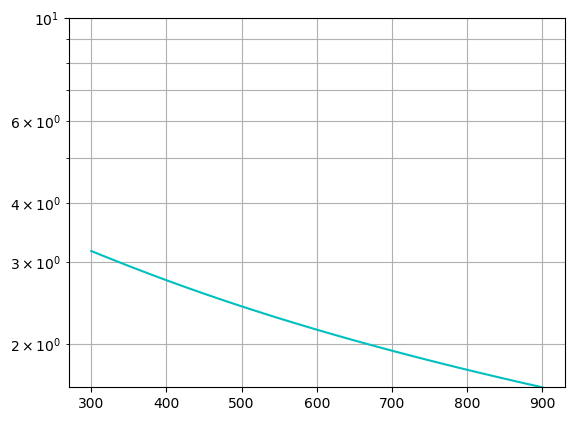

In [18]:
semilogy(Ts,kls[:,1,1],linestyle="-",color="c")
ylim(0,10)

grid(true,which="both")


In [19]:
tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]

3-element Array{tau_phonon_B,1}:
 tau_phonon_B(Function[tauPHNTf, tauPHUTf, tauPHALLTf, tauPHeTfX3, tauPHeTfX1, tauPHBTf, tauPHNPTf], Any[[0.00010021, 0.000101108, 0.000102722, 0.000105055, 0.000108104, 0.000111872, 0.000116356, 0.000121558, 0.000127478, 0.000134115  …  0.145627, 0.145634, 0.14564, 0.145645, 0.145649, 0.145653, 0.145656, 0.145659, 0.14566, 0.145661], 900.0, 1.7, 1.7, 1.0, 239.945, 131.095, 131.095, 9.26138e-26, 9.26138e-26  …  6.10329e-31, 3.46157e-31, 0.2589, 0.2589, 3581.71, 5, 0.2289, 7.5e-9, 1.76715e-24, 2.82942e22])
 tau_phonon_B(Function[tauPHNTf], Any[[0.00010021, 0.000101108, 0.000102722, 0.000105055, 0.000108104, 0.000111872, 0.000116356, 0.000121558, 0.000127478, 0.000134115  …  0.145627, 0.145634, 0.14564, 0.145645, 0.145649, 0.145653, 0.145656, 0.145659, 0.14566, 0.145661], 900.0, 1.7, 1.7, 1.0, 239.945, 131.095, 131.095, 9.26138e-26, 9.26138e-26  …  6.10329e-31, 3.46157e-31, 0.2589, 0.2589, 3581.71, 5, 0.2289, 7.5e-9, 1.76715e-24, 2.82942e22])             

In [20]:
klscomp=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
klscomp=thermalPropsiso(Ts,tauPHL,tauPHTx,tauPHTy,[vL,vT,vT])

61×1×1 Array{Float64,3}:
[:, :, 1] =
 3.1637554263048036
 3.1164252924377105
 3.0702209484168996
 3.025135149521505 
 2.981154689265079 
 2.9382618813043475
 2.8964357197883075
 2.855652791305538 
 2.815887993357237 
 2.7771151008552057
 2.739307212373402 
 2.7024371007410437
 2.666477487266064 
 ⋮                 
 1.777355295222378 
 1.7613519463671097
 1.7456275772450651
 1.7301745704504212
 1.7149855465289516
 1.7000533563862508
 1.6853710743708172
 1.6709319919763101
 1.6567296120957027
 1.6427576437496854
 1.6290099972033627
 1.6154807793798212

In [21]:
xxsp=0.6
xsp=(100-xxsp)/100
Eep=7.0
etha=0.96
thetaD=350.0#524.0
#gammaSA,GM,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha

Tt=thetaD
gammaSA=2.02
beta=2.0

eps=39
deltaSi=6.39e-10
deltaGe=6.77e-10
delta=deltaSi*(1-xsp)+deltaGe*xsp
deltacgs=delta*100
V=((1-xsp)*(6.39e-10)^3+xsp*(6.77e-10)^3)/12
MSiGecgs(xsp)=(2*(24.305)+(28.0855*(1-xsp)+118.71*xsp))/3
#G=1.033*(1-xsp)+1.017*xsp

a3=((1-xsp)*(6.39e-10)^3+xsp*(6.77e-10)^3)/12
a1=a3^(1/3)
#vtt=kB/hbar*(6*pi*pi)^(-1/3)*thetaD*delta
dd=(4.66e-26*(1-xsp)+1.206e-25*xsp)/(2e-29*(1-xsp)+2.2636e-29*xsp)

delMSiGe=(2*(24.305)+(28.0855*(1-xsp)-118.71*xsp))/3
deldelta=deltaSi-deltaGe
mbar=(28.0855*(1-xsp)+118.71*xsp)
GM=(1-xsp)*((28.0855-mbar)/mbar)^2+xsp*((118.71-mbar)/mbar)^2

omegaD=thetaD*kB/hbar
mds=0.5*me#0.427*me
#vt=5880.0

4.55469178e-31

In [22]:
function tauPH_U_SAT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,
    theta::Float64,omegaD::Float64,beta::Float64,delta::Float64)
    #intx is different from x in oither phonon calculations intx=omega/omegaD
    Mcgs=M
    #println("Mcgs= ",Mcgs)
    deltacgs=delta*100
    #println("deltacgs= ",deltacgs)
    #println("1/Mcgs/deltacgs^2/(theta/T)= ",(1/Mcgs/deltacgs^2/(theta/T)))
    return 1 ./((3.264e-2)*((1+beta*(5/9))/(1+beta))*gamma^2 .*intx.^2 ./Mcgs/deltacgs^2/(theta/T))    
end

function tauPH_EP_SAT(Eep::Float64,md::Float64,x::Array{Float64},Ef::Float64,
    T::Float64,M::Float64,theta::Float64,delta::Float64)
    eta=Ef#Ef*q/kB/T
    deltacgs=delta*100
    Mcgs=M
    A=6.76e26(md/me)^2*deltacgs^2/Mcgs
    y=3.72e9(md/me)*deltacgs^2*theta
    D=1.68e-11/(md/me)/deltacgs^2/theta
    alphat=thetaD/T
    #println("alphat ",alphat)
    lambda=3
    ex1=1 .+exp.(-alphat*y+eta .-D*alphat*x .*x .+alphat .*x/2)
    ex2=1 .+exp.(-alphat*y+eta .-D*alphat*x .*x .-alphat .*x/2)    
    ext=ex1 ./ex2
    logt=log.(ext)
    return 1 ./(lambda*(A*Eep^2/alphat) .*logt) 
end

function tauPH_PD_SAT(GM::Float64,intx::Array{Float64},theta::Float64)
    return 1 ./(6.17e11*theta*GM .*intx .^4)
end


function I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1) ./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x) .+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=tauPH_C_SA_Af(x) .*(x .^4)*alphat^2 .*exp.(alphat*x) ./(exp.(alphat*x) .-1) .^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1)./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x)+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x).*(x.^4)*alphat^2 .*exp.(alphat*x)./(exp.(alphat*x) .-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1)./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x)+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*1 ./tauPH_U_SA_Af(x).*
    (1 .-beta*tauPH_C_SA_Af(x) ./tauPH_U_SA_Af(x)).*(x.^4)*alphat^2 .*exp.(alphat*x)./(exp.(alphat*x) .-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function klt(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)    
    I1t=I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I2t=I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I3t=I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    return 4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)#(I1t+I2t.^2/I3t)#(kB*thetaD/hbar)^3*(I1t+I2t.^2/I3t)    #4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)    
end
klt_SA_A=Array{Float64,1}(undef,length(Ts))
for Tti in 1:length(Ts)
    klt_SA_A[Tti]=klt(gammaSA,GM,Ts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,
        Efsr[Tti,1,1]/kBe/Ts[Tti])
    #klt_V_A[Tti]=kltV(gammaSA,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)*(thetaD/Ttt)^2    
end

In [23]:
MgSiSn4hKCT=[27.204980536447565,125.22263104569937,250.3986028902043, 300.61256865568174,350.4225990508186, 400.31661600810537,
450.60323681544304,500.88852450274595,550.37460672959,]
MgSiSn4hKCK=[ 2.8789473684210525, 2.7375, 2.609210526315789, 2.5121710526315786, 2.4184210526315786, 2.531907894736842, 2.614144736842105
, 2.6930921052631573, 2.7999999999999994]
MgSiSn2hKCT=[27.174994546327184, 125.66321921825845, 250.56521889830958, 300.8030294412153, 350.04276302458277,400.3366068836394, 
450.6409643790327, 500.95101524496823,550.7594666065552]
MgSiSn2hKCK=[2.608956937799043, 2.4846513157894736, 2.4523355263157893, 2.3861330409356722, 2.3131756578947367
, 2.385235380116959, 2.4832374999999995, 2.595288011695906, 2.697641746411483]
MgSiSn05hKCT=[26.1867119039,124.6184700145,249.7991072943,300.1809590466,349.8324946796,399.3641637338,450.1016014407,
450.7811561579,549.7232004091,500.4092678505]
MgSiSn05hKCK=[2.4217028509,2.3627326555,2.2459551435,2.1025076754,2.0223385167,2.2370652412,2.3803594498,2.302875,
2.5966549043,2.5105263158]
MgSiSn2h2TiO2KCT=[450.7811561579,26.5677491601,125.429931211,250.6172345758,300.4185996907,350.6278995361,
400.1639737642,500.3759398496,550.2639577668]
MgSiSn2h2TiO2KCK=[2.302875,2.3065789474,2.2490131579,2.1486842105,2.0335526316,1.925,2.1552631579,2.4282894737,
2.5269736842]
MgSiSn2h5TiO2KCT=[27.3549565403,124.5907321495,250.1753052845,299.9806697595,350.1926358449,400.1339785634,
450.0339945609,500.3299472084,550.6152348958]
MgSiSn2h5TiO2KCK=[2.2490131579,2.1782894737,2.0582236842,1.9529605263,1.8509868421,2.08125,2.2095394737,2.3148026316,
2.39375]
MgSiSn0hKCT=[26.9755694846,125.1437396683,250.3474884019,300.0735322348,349.8027683571,400.6191835973,449.916314723,
500.2366154749,550.052698235]
MgSiSn0hKCK=[2.1168755981,2.0268355263,1.9150855263,1.8140986842,1.7209888158,1.8544934211,1.9231644737,2.0605065789,
2.1816907895]

9-element Array{Float64,1}:
 2.1168755981
 2.0268355263
 1.9150855263
 1.8140986842
 1.7209888158
 1.8544934211
 1.9231644737
 2.0605065789
 2.1816907895

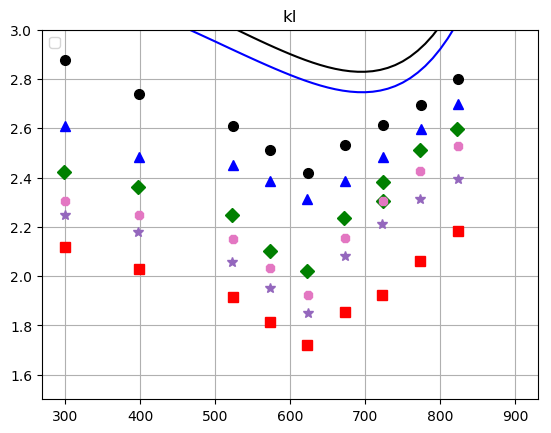

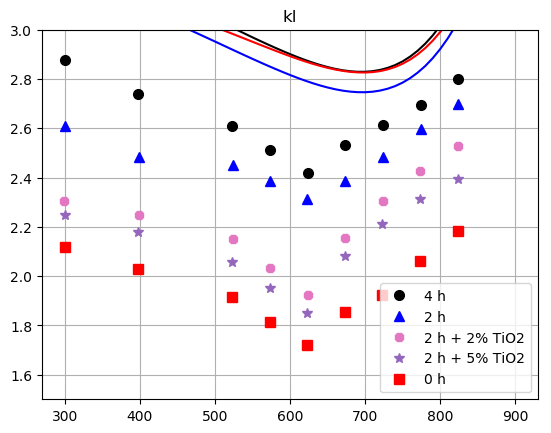

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
No handles with labels found to put in legend.


In [24]:
figure()
title("kl")
plot(Ts,36*klt_SA_A .+kes[:,1,1] .+0.6*kbis[:,1,1],Linestyle="-",color="k")
plot(Ts,34*klt_SA_A .+kes[:,1,1]+0.567 .*kbis[:,1,1],Linestyle="-",color="b")
plot(Ts,28*klt_SA_A .+1.48kes[:,1,1] .+0.57*kbis[:,1,1],Linestyle="-",color="g")
plot(Ts,29*klt_SA_A .+1.5kes[:,1,1] .+0.53*kbis[:,1,1],Linestyle="-.",color="tab:pink")
plot(Ts,27*klt_SA_A .+1.5kes[:,1,1] .+0.53*kbis[:,1,1],Linestyle="-.",color="tab:purple")
plot(Ts,26*klt_SA_A /+1.3kes[:,1,1] .+0.52*kbis[:,1,1],Linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k")
plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b")
plot(MgSiSn05hKCT .+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
plot(MgSiSn2h2TiO2KCT  .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink")
plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple")
plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")
legend(loc="upper left")
ylim(1.5,3.0)
grid()


figure()
title("kl")
plot(Ts,36 .*klt_SA_A .+kes[:,1,1] .+0.6 .*kbis[:,1,1],Linestyle="-",color="k",label="")
plot(Ts,34 .*klt_SA_A .+kes[:,1,1] .+0.567 .*kbis[:,1,1],Linestyle="-",color="b")
#plot(Ts,28*klt_SA_A+1.48kes[:,1,1]+0.57*kbis[:,1,1],Linestyle="-",color="g")
plot(Ts,29 .*klt_SA_A .+1.5kes[:,1,1] .+0.53 .*kbis[:,1,1],Linestyle="-.",color="tab:pink")
plot(Ts,27 .*klt_SA_A .+1.5kes[:,1,1] .+0.53 .*kbis[:,1,1],Linestyle="-.",color="tab:purple")
plot(Ts,26 .*klt_SA_A .+1.3kes[:,1,1] .+0.52 .*kbis[:,1,1],Linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k",label="4 h")
plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b",label="2 h")
#plot(MgSiSn05hKCT+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
plot(MgSiSn2h2TiO2KCT .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink",label="2 h + 2% TiO2")
plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple",label="2 h + 5% TiO2")
plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r",label="0 h")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")

ylim(1.5,3.0)
legend(loc="lower right")
grid()


In [25]:
MgSiSn4hECE=[10,12.4,20.5,35.8,43.2,69.6,82.8,100,110]
MgSiSn2hECE=[3,4.4,8.5,15.8,22.2,55.6,50.8,68,80]
MgSiSn1hECE=[2,4.2,3.7,11.8,22.2,25.6,30.8,48,64]
MgSiSn0hECE=[1.6,1.7,3.8,7.8,12.2,25.6,40.8,68,62]

9-element Array{Float64,1}:
  1.6
  1.7
  3.8
  7.8
 12.2
 25.6
 40.8
 68.0
 62.0

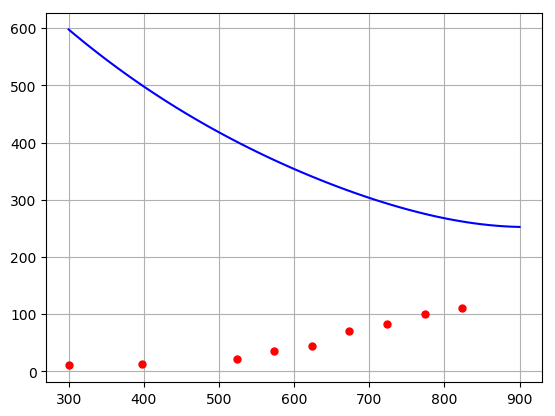

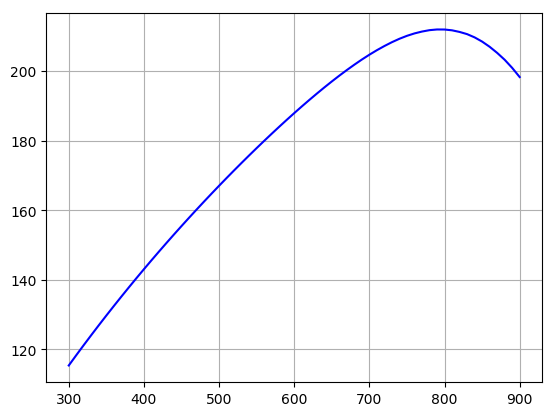

In [26]:

figure()
plot(Ts,sigmas[:,1,1]/100/6^(2/3),linestyle="-",color="b")
#plot(Ts,sigmas[:,2,2]/100/6^(2/3),linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100/6^(2/3),linestyle="-",color="k")
#plot(Ts,sigmas[:,4,4]/100/6^(2/3),linestyle="-",color="g")
plot(MgSiSn4hKCT .+273,MgSiSn4hECE,linestyle="None",marker=".",markersize=10,color="r")
#plot(MgSiSn4hKCT .+273,MgSiSn2hECE,linestyle="None",marker=".",markersize=10,color="k")
#plot(MgSiSn4hKCT .+273,MgSiSn1hECE,linestyle="None",marker=".",markersize=10,color="b")
#plot(MgSiSn4hKCT .+273,MgSiSn0hECE,linestyle="None",marker=".",markersize=10,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="b")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="k")
#plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()